In [50]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Glamorous9754/Practice-in-Jupyter/main/Data%20Files/sydney_rain%20prediction.xlsx'
df = pd.read_excel(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

# Data Cleaning

In [52]:
df_filtered =df.drop(['Date','Location'],axis=1)
df_filtered.isnull().sum()

MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [53]:
# Fill missing values for categorical data with mode
for column in ['RainToday']:
    df_filtered[column].fillna(df_filtered[column].mode()[0], inplace=True)

# Fill missing values for numerical data with median
for column in ['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine',
               'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
               'Cloud9am','Cloud3pm','Temp9am','Temp3pm']:
    df_filtered[column].fillna(df_filtered[column].mean(), inplace=True)

# Verify that missing values have been filled
df_filtered.isnull().sum(), df_filtered.head()

(MinTemp         0
 MaxTemp         0
 Rainfall        0
 Evaporation     0
 Sunshine        0
 Humidity9am     0
 Humidity3pm     0
 Pressure9am     0
 Pressure3pm     0
 Cloud9am        0
 Cloud3pm        0
 Temp9am         0
 Temp3pm         0
 RainToday       0
 RainTomorrow    0
 dtype: int64,
    MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
 0     19.5     22.4      15.6     6.200000       0.0         92.0   
 1     19.5     25.6       6.0     3.400000       2.7         83.0   
 2     21.6     24.5       6.6     2.400000       0.1         88.0   
 3     20.2     22.8      18.8     2.200000       0.0         83.0   
 4     19.7     25.7      77.4     5.187432       0.0         88.0   
 
    Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
 0         84.0       1017.6       1017.4       8.0       8.0     20.7   
 1         73.0       1017.9       1016.4       7.0       7.0     22.4   
 2         86.0       1016.7       1015.6       7.0     

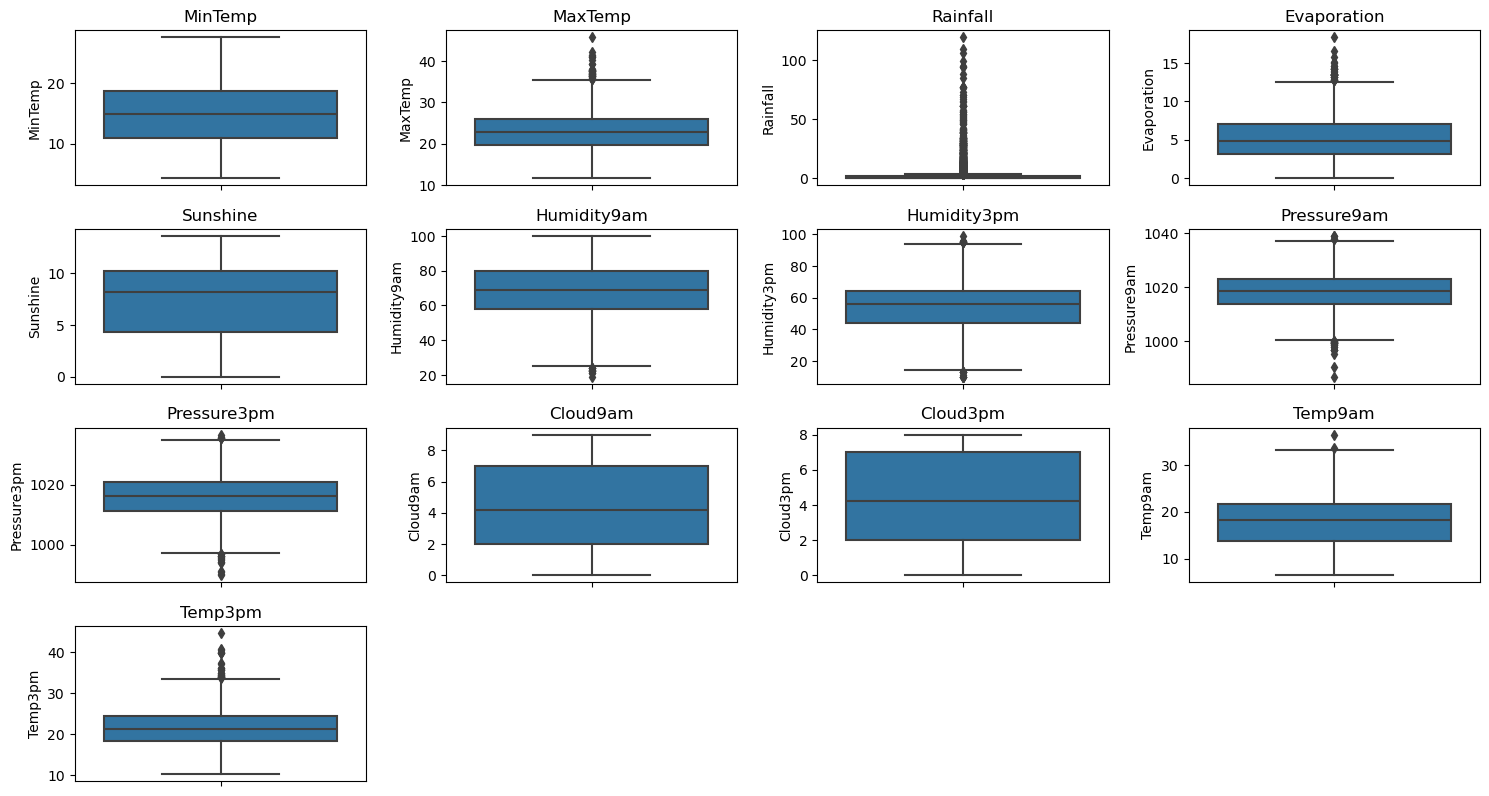

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of numerical columns to check for outliers
numerical_cols = ['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine',
               'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
               'Cloud9am','Cloud3pm','Temp9am','Temp3pm']

# Plotting boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df_filtered[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [55]:
# Create Dummy Variables
df_filtered = pd.get_dummies(df_filtered, drop_first=True).astype(int)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MinTemp           3337 non-null   int32
 1   MaxTemp           3337 non-null   int32
 2   Rainfall          3337 non-null   int32
 3   Evaporation       3337 non-null   int32
 4   Sunshine          3337 non-null   int32
 5   Humidity9am       3337 non-null   int32
 6   Humidity3pm       3337 non-null   int32
 7   Pressure9am       3337 non-null   int32
 8   Pressure3pm       3337 non-null   int32
 9   Cloud9am          3337 non-null   int32
 10  Cloud3pm          3337 non-null   int32
 11  Temp9am           3337 non-null   int32
 12  Temp3pm           3337 non-null   int32
 13  RainToday_Yes     3337 non-null   int32
 14  RainTomorrow_Yes  3337 non-null   int32
dtypes: int32(15)
memory usage: 195.7 KB


# Defining independent variable(x) and dependent variable(y)

In [56]:
x = df_filtered.drop(['RainTomorrow_Yes'],axis=1)
y = df_filtered['RainTomorrow_Yes']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(x_train)
x_train_s = sc.transform(x_train)
sc = StandardScaler().fit(x_test)
x_test_s  = sc.transform(x_test)

# Model Building

In [60]:
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,confusion_matrix

## Logistic Regression Model

In [59]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(max_iter=5000)
clf_LR.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [61]:
model = clf_LR
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
# Model Evaluation
print("Training Accuracy:", accuracy_score(y_train,y_train_pred))
print("Training F1 Score:", f1_score(y_train,y_train_pred))
print("Training Recall:", recall_score(y_train,y_train_pred))
print("Training Precision:", precision_score(y_train,y_train_pred))
print('Confusion Matrix for training data: \n',confusion_matrix(y_train, y_train_pred))

print("Testing Accuracy:", accuracy_score(y_test,y_test_pred))
print("Testing F1 Score:", f1_score(y_test,y_test_pred))
print("Testing Recall:", recall_score(y_test,y_test_pred))
print("Testing Precision:", precision_score(y_test,y_test_pred))
print('\n Confusion Matrix for testing data: \n',confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.8385162982390408
Training F1 Score: 0.6399331662489557
Training Recall: 0.5624082232011748
Training Precision: 0.7422480620155039
Confusion Matrix for training data: 
 [[1855  133]
 [ 298  383]]
Testing Accuracy: 0.8203592814371258
Testing F1 Score: 0.6319018404907976
Testing Recall: 0.5597826086956522
Testing Precision: 0.7253521126760564

 Confusion Matrix for testing data: 
 [[445  39]
 [ 81 103]]
